# Astrostat Lab4: model selection

In [1]:
# run the original notebook for M0fix and M0
%run 'fit.ipynb'

/Users/larryli/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


119  HARPS points;  122  HIRES points
Initial run of M0fix: chi2 = 395.796125725, 241 points
Real M0 run: chi2 = 390.391712065, loglike = -567.778155919


In [253]:
from scipy.special import erfinv
import numpy as np

In [3]:
# define BIC, AIC, reduced chi2, bayes factor functions

def get_BIC(loglike, k, N):
    """calculates the BIC
    Arguments:
        loglike {float} -- log likelihood
        k {int} -- number of parameters
        N {int} -- number of data points
    Return:
        BIC {float} -- Bayesian Information Criterion
    """
    BIC = k * np.log(N) - 2 * loglike
    return BIC


def get_AIC(loglike, k):
    """calculates the AIC
    Arguments:
        loglike {float} -- log likelihood
        k {int} -- number of parameters
    Return:
        AIC {float} -- Akaike Information Criterion
    """
    AIC = 2 * k - 2 * loglike
    return AIC

def get_reduced_chi2(chi2, k, N):
    """calculates the reduced chi2
    Arguments:
        chi2 {float} -- log likelihood
        k {int} -- number of parameters
        N {int} -- number of data points
    Return:
        reduced_chi2 {float}
    """
    reduced_chi2 = chi2 / (N - k)
    return reduced_chi2

def get_bayes_factor(IC1, IC2):
    """calculates the bayes factor
    Arguments:
        IC1 {float} -- could be BIC or AIC for the first model
        IC2 {float} -- could be BIC or AIC for the second model
    return:
        bayes_factor {float} -- is > 1 if IC1 < IC2
    """
    bayes_factor = np.e ** (-.5 * (IC1 - IC2))
    return bayes_factor

In [4]:
# chi2 from model def
def chi2_model(data, model, best_fit_params):
    """calculates chi2 based on model and best fit
    Arguments:
        data {np.ndarray} -- real data
        model {function} -- model
        best_fit_params {list} -- of best fit values, must match model input params
    """
    chi2 = 0.0
    for i in range(len(data)):
        m_sol = model(data[i, 0], *best_fit_params)
        chi2 = chi2 + ((data[i, 1] - m_sol) / data[i,2])**2
    return chi2

### M0fix & M0 (coded up in fix.ipynb): planets b c d e

In [54]:
# easy def for later use in CV
param_bounds_m0fix = ([-2.*np.pi]*4, [2.*np.pi]*4)
initial_guess_m0fix = [np.random.uniform(-np.pi,np.pi)]*4

param_bounds_m0 = ([0.0,  Pb_sol-3.0*Pb_del, -2.0*np.pi,
                    0.0,  Pc_sol-3.0*Pc_del, -2.0*np.pi,
                    0.0,  Pd_sol-3.0*Pd_del, -2.0*np.pi,
                    0.0,  Pe_sol-3.0*Pe_del, -2.0*np.pi],
                   [20.0, Pb_sol+3.0*Pb_del,  2.0*np.pi,
                    20.0, Pc_sol+3.0*Pc_del,  2.0*np.pi,
                    20.0, Pd_sol+3.0*Pd_del,  2.0*np.pi,
                    20.0, Pe_sol+3.0*Pe_del,  2.0*np.pi])

In [55]:
m0_N = 119 + 122 # HARPS and HIRES datapoints
m0_k = 12 # degrees of freedom
m0_chi2 = 390.531407575 # from fit.ipynb run
m0_loglike = -567.848003674 # from fit.ipynb run

In [56]:
m0_AIC = get_AIC(m0_loglike, m0_k)
m0_BIC = get_BIC(m0_loglike, m0_k, m0_N)
m0_rchi2 = get_reduced_chi2(m0_chi2, m0_k, m0_N)

### Mffix & Mf: planets b c d e + f

In [8]:
# 4 planet + f model with K & P fixed to Vogt+ reported values
def Mffix(t, qb, qc, qd, qe, qf):
    return Kb_sol*np.sin(2.0*np.pi*t/Pb_sol+qb)\
           + Kc_sol*np.sin(2.0*np.pi*t/Pc_sol+qc)\
           + Kd_sol*np.sin(2.0*np.pi*t/Pd_sol+qd)\
           + Ke_sol*np.sin(2.0*np.pi*t/Pe_sol+qe)\
           + Kf_sol*np.sin(2.0*np.pi*t/Pf_sol+qf)

# 4 planet + f full model
def Mf(t, Kb, Pb, qb, Kc, Pc, qc, Kd, Pd, qd, Ke, Pe, qe, Kf, Pf, qf):
    return Kb*np.sin(2.0*np.pi*t/Pb+qb)\
           + Kc*np.sin(2.0*np.pi*t/Pc+qc)\
           + Kd*np.sin(2.0*np.pi*t/Pd+qd)\
           + Ke*np.sin(2.0*np.pi*t/Pe+qe)\
           + Kf*np.sin(2.0*np.pi*t/Pf+qf)

In [9]:
# param bounds and initial guesses for Mffix
param_bounds_mffix = ([-2.*np.pi]*5, [2.*np.pi]*5)

initial_guess_mffix = [np.random.uniform(-np.pi,np.pi)]*5

In [10]:
# fit Mffix and get best fitting parameters and chi2
Mffix_best, Mffix_cov = curve_fit(Mffix, data[:,0], data[:,1], sigma=data[:,2],
                                  p0=initial_guess_mffix, bounds=param_bounds_mffix)

# Get the chi2
mffix_chi2 = chi2_model(data, Mffix, Mffix_best)

# Print output
print('Mffix: chi2 = {0}, {1} points'.format(mffix_chi2,len(data)))

Mffix: chi2 = 349.597443429, 241 points


In [11]:
# setting phase solutions as initial guesses for Mf
qb_sol_mffix, qc_sol_mffix, qd_sol_mffix, qe_sol_mffix, qf_sol_mffix = Mffix_best

In [12]:
# param bounds and initial guesses for Mf, first four bounds same as m0
param_bounds_mf = (param_bounds_m0[0] + [0.0,  Pf_sol-3.0*Pf_del, -2.0*np.pi],
                   param_bounds_m0[1] + [20.0, Pf_sol+3.0*Pf_del,  2.0*np.pi])

# mffix results as inputs
initial_guess_mf = [Kb_sol, Pb_sol, qb_sol_mffix,
                    Kc_sol, Pc_sol, qc_sol_mffix,
                    Kd_sol, Pd_sol, qd_sol_mffix,
                    Ke_sol, Pe_sol, qe_sol_mffix,
                    Kf_sol, Pf_sol, qf_sol_mffix]

In [13]:
# fit Mf and get best fitting parameters and chi2 and loglike
Mf_best, Mf_cov = curve_fit(Mf, data[:,0], data[:,1], sigma=data[:,2],
                            p0=initial_guess_mf, bounds=param_bounds_mf)

# Get the chi2
mf_chi2 = chi2_model(data, Mf, Mf_best)

# Get the loglike
mf_loglike = -0.5*len(data)*np.log(2.0*np.pi) - np.sum(np.log(data[:,2])) - 0.5*mf_chi2

# Print output
print('Mf run: chi2 = {0}, loglike = {1}'.format(mf_chi2,mf_loglike))

Mf run: chi2 = 345.498471424, loglike = -545.331535598


In [14]:
# AIC, BIC, reduced chi2 for Mf
mf_N = m0_N # same number of datapoints
mf_k = 15 # degrees of freedom

mf_AIC = get_AIC(mf_loglike, mf_k)
mf_BIC = get_BIC(mf_loglike, mf_k, mf_N)
mf_rchi2 = get_reduced_chi2(mf_chi2, mf_k, mf_N)

### Mgfix & Mg: planets b c d e + g

In [15]:
# 4 planet + g model with K & P fixed to Vogt+ reported values
def Mgfix(t, qb, qc, qd, qe, qg):
    return Kb_sol*np.sin(2.0*np.pi*t/Pb_sol+qb)\
           + Kc_sol*np.sin(2.0*np.pi*t/Pc_sol+qc)\
           + Kd_sol*np.sin(2.0*np.pi*t/Pd_sol+qd)\
           + Ke_sol*np.sin(2.0*np.pi*t/Pe_sol+qe)\
           + Kg_sol*np.sin(2.0*np.pi*t/Pg_sol+qg)

# 4 planet + g full model
# in reality this is the same model as Mf (a 4 sinusoid with no fixed parameters)
def Mg(t, Kb, Pb, qb, Kc, Pc, qc, Kd, Pd, qd, Ke, Pe, qe, Kg, Pg, qg):
    return Mf(t, Kb, Pb, qb, Kc, Pc, qc, Kd, Pd, qd, Ke, Pe, qe, Kg, Pg, qg)

In [16]:
# param bounds and initial guesses for Mffix
param_bounds_mgfix = ([-2.*np.pi]*5, [2.*np.pi]*5)

initial_guess_mgfix = [np.random.uniform(-np.pi,np.pi)]*5

In [17]:
# fit Mffix and get best fitting parameters and chi2
Mgfix_best, Mgfix_cov = curve_fit(Mgfix, data[:,0], data[:,1], sigma=data[:,2],
                                  p0=initial_guess_mgfix, bounds=param_bounds_mgfix)

# Get the chi2
mgfix_chi2 = chi2_model(data, Mgfix, Mgfix_best)

# Print output
print('Mgfix: chi2 = {0}, {1} points'.format(mgfix_chi2,len(data)))

Mgfix: chi2 = 347.861935825, 241 points


In [18]:
# setting phase solutions as initial guesses for Mg
qb_sol_mgfix, qc_sol_mgfix, qd_sol_mgfix, qe_sol_mgfix, qg_sol_mgfix = Mgfix_best

In [19]:
# param bounds and initial guesses for Mg
# the first 4 bounds are the same as for M0
param_bounds_mg = (param_bounds_m0[0] + [0.0, Pg_sol-3.0*Pg_del, -2.0*np.pi],
                   param_bounds_m0[1] + [20.0, Pg_sol+3.0*Pg_del,  2.0*np.pi])

# mgfix results as inputs
initial_guess_mg = [Kb_sol, Pb_sol, qb_sol_mgfix,
                    Kc_sol, Pc_sol, qc_sol_mgfix,
                    Kd_sol, Pd_sol, qd_sol_mgfix,
                    Ke_sol, Pe_sol, qe_sol_mgfix,
                    Kg_sol, Pg_sol, qg_sol_mgfix]

In [20]:
# fit Mg and get best fitting parameters and chi2 and loglike
Mg_best, Mg_cov = curve_fit(Mg, data[:,0], data[:,1], sigma=data[:,2],
                            p0=initial_guess_mg, bounds=param_bounds_mg)

# Get the chi2
mg_chi2 = chi2_model(data, Mg, Mg_best)

# Get the loglike
mg_loglike = -0.5*len(data)*np.log(2.0*np.pi) - np.sum(np.log(data[:,2])) - 0.5*mg_chi2

# Print output
print('Mg run: chi2 = {0}, loglike = {1}'.format(mg_chi2, mg_loglike))

Mg run: chi2 = 341.941846542, loglike = -543.553223157


In [21]:
# AIC, BIC, reduced chi2 for Mg
mg_N = m0_N # same number of datapoints
mg_k = 15 # degrees of freedom

mg_AIC = get_AIC(mg_loglike, mg_k)
mg_BIC = get_BIC(mg_loglike, mg_k, mg_N)
mg_rchi2 = get_reduced_chi2(mg_chi2, mg_k, mg_N)

### Mfgfix & Mfg: planets b c d e + f&g

In [22]:
# 4 planet + f + g model with K & P fixed to Vogt+ reported values
def Mfgfix(t, qb, qc, qd, qe, qf, qg):
    return Kb_sol*np.sin(2.0*np.pi*t/Pb_sol+qb)\
           + Kc_sol*np.sin(2.0*np.pi*t/Pc_sol+qc)\
           + Kd_sol*np.sin(2.0*np.pi*t/Pd_sol+qd)\
           + Ke_sol*np.sin(2.0*np.pi*t/Pe_sol+qe)\
           + Kf_sol*np.sin(2.0*np.pi*t/Pf_sol+qf)\
           + Kg_sol*np.sin(2.0*np.pi*t/Pg_sol+qg)

# 4 planet + f + g full model
def Mfg(t, Kb, Pb, qb, Kc, Pc, qc, Kd, Pd, qd, Ke, Pe, qe, Kf, Pf, qf, Kg, Pg, qg):
    return Kb*np.sin(2.0*np.pi*t/Pb+qb)\
           + Kc*np.sin(2.0*np.pi*t/Pc+qc)\
           + Kd*np.sin(2.0*np.pi*t/Pd+qd)\
           + Ke*np.sin(2.0*np.pi*t/Pe+qe)\
           + Kf*np.sin(2.0*np.pi*t/Pf+qf)\
           + Kg*np.sin(2.0*np.pi*t/Pg+qg)

In [23]:
# param bounds and initial guesses for Mfgfix
param_bounds_mfgfix = ([-2.*np.pi]*6, [2.*np.pi]*6)

initial_guess_mfgfix = [np.random.uniform(-np.pi,np.pi)]*6

In [24]:
# fit Mfgfix and get best fitting parameters and chi2
Mfgfix_best, Mfgfix_cov = curve_fit(Mfgfix, data[:,0], data[:,1], sigma=data[:,2],
                                  p0=initial_guess_mfgfix, bounds=param_bounds_mfgfix)

# Get the chi2
mfgfix_chi2 = chi2_model(data, Mfgfix, Mfgfix_best)

# Print output
print('Mfgfix: chi2 = {0}, {1} points'.format(mfgfix_chi2,len(data)))

Mfgfix: chi2 = 302.861634452, 241 points


In [25]:
# setting phase solutions as initial guesses for Mfg
qb_sol_mfgfix, qc_sol_mfgfix, qd_sol_mfgfix, qe_sol_mfgfix, qf_sol_mfgfix, qg_sol_mfgfix = Mfgfix_best

In [26]:
# param bounds and initial guesses for Mfg
# the first 5 bounds are the same as for Mf
param_bounds_mfg = (param_bounds_mf[0] + [0.0, Pg_sol-3.0*Pg_del, -2.0*np.pi],
                   param_bounds_mf[1] + [20.0, Pg_sol+3.0*Pg_del,  2.0*np.pi])

# mgfix results as inputs
initial_guess_mfg = [Kb_sol, Pb_sol, qb_sol_mfgfix,
                    Kc_sol, Pc_sol, qc_sol_mfgfix,
                    Kd_sol, Pd_sol, qd_sol_mfgfix,
                    Ke_sol, Pe_sol, qe_sol_mfgfix,
                    Kf_sol, Pf_sol, qf_sol_mfgfix,
                    Kg_sol, Pg_sol, qg_sol_mfgfix]

In [27]:
# fit Mg and get best fitting parameters and chi2 and loglike
Mfg_best, Mfg_cov = curve_fit(Mfg, data[:,0], data[:,1], sigma=data[:,2],
                              p0=initial_guess_mfg, bounds=param_bounds_mfg)

# Get the chi2
mfg_chi2 = chi2_model(data, Mfg, Mfg_best)

# Get the loglike
mfg_loglike = -0.5*len(data)*np.log(2.0*np.pi) - np.sum(np.log(data[:,2])) - 0.5*mfg_chi2

# Print output
print('Mg run: chi2 = {0}, loglike = {1}'.format(mfg_chi2, mfg_loglike))

Mg run: chi2 = 297.536671208, loglike = -521.35063549


In [28]:
# AIC, BIC, reduced chi2 for Mfg
mfg_N = m0_N # same number of datapoints
mfg_k = 18 # degrees of freedom

mfg_AIC = get_AIC(mfg_loglike, mfg_k)
mfg_BIC = get_BIC(mfg_loglike, mfg_k, mfg_N)
mfg_rchi2 = get_reduced_chi2(mfg_chi2, mfg_k, mfg_N)

### Simple model comparison

In [29]:
# looking at results
print('Chi2:\n\tM0: {0} \tMf: {1} \tMg: {2} \tMfg: {3}'
      .format(m0_chi2, mf_chi2, mg_chi2, mfg_chi2))
print('Reduced chi2:\n\tM0: {0} \tMf: {1} \tMg: {2} \tMfg: {3}'
      .format(m0_rchi2, mf_rchi2, mg_rchi2, mfg_rchi2))
print('BIC:\n\tM0: {0} \tMf: {1} \tMg: {2} \tMfg: {3}'
      .format(m0_BIC, mf_BIC, mg_BIC, mfg_BIC))
print('AIC:\n\tM0: {0} \tMf: {1} \tMg: {2} \tMfg: {3}'
      .format(m0_AIC, mf_AIC, mg_AIC, mfg_AIC))

print('\nChi2 and reduced chi2 do go down as we go to more complex models, but are they really better?')

Chi2:
	M0: 390.531407575 	Mf: 345.498471424 	Mg: 341.941846542 	Mfg: 297.536671208
Reduced chi2:
	M0: 1.70537732566 	Mf: 1.52875429834 	Mg: 1.5130170201 	Mfg: 1.33424516237
BIC:
	M0: 1201.51357055 	Mf: 1172.9350252 	Mg: 1169.37840032 	Mfg: 1141.42761578
AIC:
	M0: 1159.69600735 	Mf: 1120.6630712 	Mg: 1117.10644631 	Mfg: 1078.70127098

Chi2 and reduced chi2 do go down as we go to more complex models, but are they really better?


In [32]:
# Bayes factor from BIC
b_00_bic = get_bayes_factor(m0_BIC, m0_BIC)
b_0f_bic = get_bayes_factor(m0_BIC, mf_BIC)
b_0g_bic = get_bayes_factor(m0_BIC, mg_BIC)
b_0fg_bic = get_bayes_factor(m0_BIC, mfg_BIC)

print('Bayes factor approximated with the BIC:\n\tB_00: {0} \tB_0f: {1} \tB_0g: {2} \tB_0fg: {3}'
      .format(b_00_bic, b_0f_bic, b_0g_bic, b_0fg_bic))

Bayes factor approximated with the BIC:
	B_00: 1.0 	B_0f: 6.2265535363e-07 	B_0g: 1.05180794321e-07 	B_0fg: 8.96397635566e-14


In [33]:
# Bayes factor from AIC
b_00_aic = get_bayes_factor(m0_AIC, m0_AIC)
b_0f_aic = get_bayes_factor(m0_AIC, mf_AIC)
b_0g_aic = get_bayes_factor(m0_AIC, mg_AIC)
b_0fg_aic = get_bayes_factor(m0_AIC, mfg_AIC)

print('Bayes factor approximated with the AIC:\n\tB_00: {0} \tB_0f: {1} \tB_0g: {2} \tB_0fg: {3}'
      .format(b_00_aic, b_0f_aic, b_0g_aic, b_0fg_aic))

Bayes factor approximated with the AIC:
	B_00: 1.0 	B_0f: 3.34276316885e-09 	B_0g: 5.64669496982e-10 	B_0fg: 2.58354759108e-18


### Cross validation

In [35]:
# leave p out def
def select_training_validation_sets(data, p):
    """select the training set and the validation set with leave p-out method
    Arguments:
        data {np.ndarray} -- of full dataset (assuming 2d for now)
        p {int} -- number of datapoints to leave out
    Return:
        t_data {np.ndarray} -- of training set
        v_data {np.ndarray} -- of validation set
    """
    num_data_points, num_data_dim = data.shape
    assert p < .33 * num_data_points, 'Leaving out too many data points in leave p-out!'
    
    # placeholder data stacks
    t_set_list = []
    v_set_list = []

    # p choice indices set
    p_set = set(np.random.choice(range(num_data_points), p, replace=False))

    # assign data rows to data stacks based on if row is in p choice indices set
    for r in range(num_data_points):
        row = data[r,:]
        if r in p_set:
            v_set_list.append(row)
        else:
            t_set_list.append(row)
        
    t_data = np.vstack(tuple(t_set_list))
    v_data = np.vstack(tuple(v_set_list))
    return t_data, v_data

In [195]:
def do_cv_on_all_models(p):
    """cross validation on m0, mf, mg, mfg
    Arguments:
        p {int} -- number of points in leave p out
    Return:
        chi2, BIC, AIC for each model (4 by 3 np array)
    """

    training_set, validation_set = select_training_validation_sets(data, p)

    # m0: b c d e
    # fit m0fix first with training set and update initial guess
    cv_m0fix_best, cv_m0fix_cov = curve_fit(M0fix, training_set[:,0], training_set[:,1], sigma=training_set[:,2],
                                            p0=initial_guess_m0fix, bounds=param_bounds_m0fix)
    cv_qb_sol_m0fix, cv_qc_sol_m0fix, cv_qd_sol_m0fix, cv_qe_sol_m0fix = cv_m0fix_best
    cv_initial_guess_m0 = [Kb_sol, Pb_sol, cv_qb_sol_m0fix,
                           Kc_sol, Pc_sol, cv_qc_sol_m0fix,
                           Kd_sol, Pd_sol, cv_qd_sol_m0fix,
                           Ke_sol, Pe_sol, cv_qe_sol_m0fix]
    # fit m0 with training set and updated initial guess from the m0fix training set fit
    cv_m0_best, cv_m0_cov = curve_fit(M0, training_set[:,0], training_set[:,1], sigma=training_set[:,2],
                                      p0=cv_initial_guess_m0, bounds=param_bounds_m0)
    # Get the chi2 from the validation set
    cv_m0_chi2 = chi2_model(validation_set, M0, cv_m0_best)
    # Get the loglike
    cv_m0_loglike = -0.5*len(validation_set)*np.log(2.0*np.pi) - np.sum(np.log(validation_set[:,2])) - 0.5*cv_m0_chi2


    # mf: b c d e + f
    # fit mffix first with training set and update initial guess
    cv_mffix_best, cv_mffix_cov = curve_fit(Mffix, training_set[:,0], training_set[:,1], sigma=training_set[:,2],
                                            p0=initial_guess_mffix, bounds=param_bounds_mffix)
    cv_qb_sol_mffix, cv_qc_sol_mffix, cv_qd_sol_mffix, cv_qe_sol_mffix, cv_qf_sol_mffix = cv_mffix_best
    cv_initial_guess_mf = [Kb_sol, Pb_sol, cv_qb_sol_mffix,
                           Kc_sol, Pc_sol, cv_qc_sol_mffix,
                           Kd_sol, Pd_sol, cv_qd_sol_mffix,
                           Ke_sol, Pe_sol, cv_qe_sol_mffix,
                           Kf_sol, Pf_sol, cv_qf_sol_mffix]
    # fit mf with training set and updated initial guess from the mffix training set fit
    cv_mf_best, cv_mf_cov = curve_fit(Mf, training_set[:,0], training_set[:,1], sigma=training_set[:,2],
                                      p0=cv_initial_guess_mf, bounds=param_bounds_mf)
    # Get the chi2 from the validation set
    cv_mf_chi2 = chi2_model(validation_set, Mf, cv_mf_best)
    # Get the loglike
    cv_mf_loglike = -0.5*len(validation_set)*np.log(2.0*np.pi) - np.sum(np.log(validation_set[:,2])) - 0.5*cv_mf_chi2


    # mg: b c d e + g
    # fit mgfix first with training set and update initial guess
    cv_mgfix_best, cv_mgfix_cov = curve_fit(Mgfix, training_set[:,0], training_set[:,1], sigma=training_set[:,2],
                                            p0=initial_guess_mgfix, bounds=param_bounds_mgfix)
    cv_qb_sol_mgfix, cv_qc_sol_mgfix, cv_qd_sol_mgfix, cv_qe_sol_mgfix, cv_qg_sol_mgfix = cv_mgfix_best
    cv_initial_guess_mg = [Kb_sol, Pb_sol, cv_qb_sol_mgfix,
                           Kc_sol, Pc_sol, cv_qc_sol_mgfix,
                           Kd_sol, Pd_sol, cv_qd_sol_mgfix,
                           Ke_sol, Pe_sol, cv_qe_sol_mgfix,
                           Kg_sol, Pg_sol, cv_qg_sol_mgfix]
    # fit mg with training set and updated initial guess from the mgfix training set fit
    cv_mg_best, cv_mg_cov = curve_fit(Mg, training_set[:,0], training_set[:,1], sigma=training_set[:,2],
                                      p0=cv_initial_guess_mg, bounds=param_bounds_mg)
    # Get the chi2 from the validation set
    cv_mg_chi2 = chi2_model(validation_set, Mg, cv_mg_best)
    # Get the loglike
    cv_mg_loglike = -0.5*len(validation_set)*np.log(2.0*np.pi) - np.sum(np.log(validation_set[:,2])) - 0.5*cv_mg_chi2


    # mfg: b c d e + f g
    # fit mfgfix first with training set and update initial guess
    cv_mfgfix_best, cv_mfgfix_cov = curve_fit(Mfgfix, training_set[:,0], training_set[:,1], sigma=training_set[:,2],
                                              p0=initial_guess_mfgfix, bounds=param_bounds_mfgfix)
    cv_qb_sol_mfgfix, cv_qc_sol_mfgfix, cv_qd_sol_mfgfix, cv_qe_sol_mfgfix,\
        cv_qf_sol_mfgfix,cv_qg_sol_mfgfix=cv_mfgfix_best
    cv_initial_guess_mfg = [Kb_sol, Pb_sol, cv_qb_sol_mfgfix,
                            Kc_sol, Pc_sol, cv_qc_sol_mfgfix,
                            Kd_sol, Pd_sol, cv_qd_sol_mfgfix,
                            Ke_sol, Pe_sol, cv_qe_sol_mfgfix,
                            Kf_sol, Pf_sol, cv_qf_sol_mfgfix,
                            Kg_sol, Pg_sol, cv_qg_sol_mfgfix]
    # fit mfg with training set and updated initial guess from the mfgfix training set fit
    cv_mfg_best, cv_mfg_cov = curve_fit(Mfg, training_set[:,0], training_set[:,1], sigma=training_set[:,2],
                                        p0=cv_initial_guess_mfg, bounds=param_bounds_mfg)

    # Get the chi2 from the validation set
    cv_mfg_chi2 = chi2_model(validation_set, Mfg, cv_mfg_best)
    # Get the loglike
    cv_mfg_loglike = -0.5*len(validation_set)*np.log(2.0*np.pi) - np.sum(np.log(validation_set[:,2])) - 0.5*cv_mfg_chi2


    cv_N = len(training_set) # number of points in the training set

    # AIC and BIC for the validation runs
    cv_m0_AIC = get_AIC(cv_m0_loglike, m0_k)
    cv_m0_BIC = get_BIC(cv_m0_loglike, m0_k, cv_N)
    cv_mf_AIC = get_AIC(cv_mf_loglike, mf_k)
    cv_mf_BIC = get_BIC(cv_mf_loglike, mf_k, cv_N)
    cv_mg_AIC = get_AIC(cv_mg_loglike, mg_k)
    cv_mg_BIC = get_BIC(cv_mg_loglike, mg_k, cv_N)
    cv_mfg_AIC = get_AIC(cv_mfg_loglike, mfg_k)
    cv_mfg_BIC = get_BIC(cv_mfg_loglike, mfg_k, cv_N)
    
    # formatting return
    r_m0 = np.array([cv_m0_chi2, cv_m0_BIC, cv_m0_AIC])
    r_mf = np.array([cv_mf_chi2, cv_mf_BIC, cv_mf_AIC])
    r_mg = np.array([cv_mg_chi2, cv_mg_BIC, cv_mg_AIC])
    r_mfg = np.array([cv_mfg_chi2, cv_mfg_BIC, cv_mfg_AIC])
    return np.vstack((r_m0, r_mf, r_mg, r_mfg))

In [196]:
# CV many many times
cv_runs = 1000
# roughly 20% of our dataset
p = 50

In [197]:
# CV results
cv_m0_stack_list = []
cv_mf_stack_list = []
cv_mg_stack_list = []
cv_mfg_stack_list = []

for i in range(cv_runs):
    cv_results = do_cv_on_all_models(p)
    cv_m0_stack_list.append(cv_results[0])
    cv_mf_stack_list.append(cv_results[1])
    cv_mg_stack_list.append(cv_results[2])
    cv_mfg_stack_list.append(cv_results[3])

cv_m0_stack = np.vstack((cv_m0_stack_list))
cv_mf_stack = np.vstack((cv_mf_stack_list))
cv_mg_stack = np.vstack((cv_mg_stack_list))
cv_mfg_stack = np.vstack((cv_mfg_stack_list))

### Looking at cross validation results

In [198]:
print('On average, over {0} iterations of cross validation with leave p-out (p = {1}):'.format(cv_runs, p))
print('M0:\n\tChi2: {0} \tBIC: {1} \tAIC: {0}'.format(*tuple(np.mean(cv_m0_stack, 0))))
print('Mf:\n\tChi2: {0} \tBIC: {1} \tAIC: {0}'.format(*tuple(np.mean(cv_mf_stack, 0))))
print('Mg:\n\tChi2: {0} \tBIC: {1} \tAIC: {0}'.format(*tuple(np.mean(cv_mg_stack, 0))))
print('Mfg:\n\tChi2: {0} \tBIC: {1} \tAIC: {0}'.format(*tuple(np.mean(cv_mfg_stack, 0))))

On average, over 1000 iterations of cross validation with leave p-out (p = 50):
M0:
	Chi2: 89.5055679639 	BIC: 307.114269084 	AIC: 89.5055679639
Mf:
	Chi2: 80.5815135805 	BIC: 313.947034985 	AIC: 80.5815135805
Mg:
	Chi2: 80.1307611087 	BIC: 313.496282513 	AIC: 80.1307611087
Mfg:
	Chi2: 71.2653877773 	BIC: 320.387729465 	AIC: 71.2653877773


In [199]:
# Bayes factor from cross validation BIC
_, cv_m0_avg_BIC, cv_m0_avg_AIC = np.mean(cv_m0_stack, 0)
_, cv_mf_avg_BIC, cv_mf_avg_AIC = np.mean(cv_mf_stack, 0)
_, cv_mg_avg_BIC, cv_mg_avg_AIC = np.mean(cv_mg_stack, 0)
_, cv_mfg_avg_BIC, cv_mfg_avg_AIC = np.mean(cv_mfg_stack, 0)

b_00_cv_avg_bic = get_bayes_factor(cv_m0_avg_BIC, cv_m0_avg_BIC)
b_0f_cv_avg_bic = get_bayes_factor(cv_m0_avg_BIC, cv_mf_avg_BIC)
b_0g_cv_avg_bic = get_bayes_factor(cv_m0_avg_BIC, cv_mg_avg_BIC)
b_0fg_cv_avg_bic = get_bayes_factor(cv_m0_avg_BIC, cv_mfg_avg_BIC)

print('Bayes factor approximated with the BIC (average CV):\n\tB_00: {0} \tB_0f: {1} \tB_0g: {2} \tB_0fg: {3}'
      .format(b_00_cv_avg_bic, b_0f_cv_avg_bic, b_0g_cv_avg_bic, b_0fg_cv_avg_bic))

Bayes factor approximated with the BIC (average CV):
	B_00: 1.0 	B_0f: 30.4590436591 	B_0g: 24.312891266 	B_0fg: 762.597363997


In [200]:
# Bayes factor from cross validation AIC
b_00_cv_avg_aic = get_bayes_factor(cv_m0_avg_AIC, cv_m0_avg_AIC)
b_0f_cv_avg_aic = get_bayes_factor(cv_m0_avg_AIC, cv_mf_avg_AIC)
b_0g_cv_avg_aic = get_bayes_factor(cv_m0_avg_AIC, cv_mg_avg_AIC)
b_0fg_cv_avg_aic = get_bayes_factor(cv_m0_avg_AIC, cv_mfg_avg_AIC)

print('Bayes factor approximated with the AIC (average CV):\n\tB_00: {0} \tB_0f: {1} \tB_0g: {2} \tB_0fg: {3}'
      .format(b_00_cv_avg_aic, b_0f_cv_avg_aic, b_0g_cv_avg_aic, b_0fg_cv_avg_aic))

Bayes factor approximated with the AIC (average CV):
	B_00: 1.0 	B_0f: 0.231765964145 	B_0g: 0.184999264865 	B_0fg: 0.0441531903329


In [205]:
# looking at individual CV runs
cv_results_chi2_best = np.zeros((cv_runs, 4), dtype=int)
cv_results_bic_best = np.zeros((cv_runs, 4), dtype=int)
cv_results_aic_best = np.zeros((cv_runs, 4), dtype=int)

for i in range(cv_runs):
    # checking which model had the "best" performance on the validation set
    min_chi2_ind = np.argmin([cv_m0_stack[i][0], cv_mf_stack[i][0], cv_mg_stack[i][0], cv_mfg_stack[i][0]])
    min_bic_ind = np.argmin([cv_m0_stack[i][1], cv_mf_stack[i][1], cv_mg_stack[i][1], cv_mfg_stack[i][1]])
    min_aic_ind = np.argmin([cv_m0_stack[i][2], cv_mf_stack[i][2], cv_mg_stack[i][2], cv_mfg_stack[i][2]])
    cv_results_chi2_best[i][min_chi2_ind] = 1
    cv_results_bic_best[i][min_bic_ind] = 1
    cv_results_aic_best[i][min_aic_ind] = 1

In [206]:
cv_results_chi2_best_sum = np.sum(cv_results_chi2_best, 0)
cv_results_bic_best_sum = np.sum(cv_results_bic_best, 0)
cv_results_aic_best_sum = np.sum(cv_results_aic_best, 0)

In [209]:
from matplotlib import pyplot as plt
%matplotlib inline

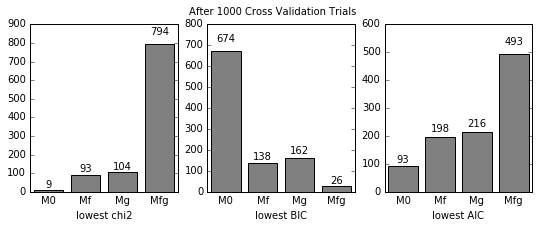

In [252]:
fig1 = plt.figure(figsize=(9,3))
ax1 = fig1.add_subplot(131)
ax2 = fig1.add_subplot(132)
ax3 = fig1.add_subplot(133)

model_names = ('M0', 'Mf', 'Mg', 'Mfg')
x = range(4)

# bar graph of rate of the model being the best model
rects1 = ax1.bar(x, cv_results_chi2_best_sum, color='gray', align='center', tick_label=model_names)
rects2 = ax2.bar(x, cv_results_bic_best_sum, color='gray', align='center', tick_label=model_names)
rects3 = ax3.bar(x, cv_results_aic_best_sum, color='gray', align='center', tick_label=model_names)

ax1.tick_params(axis='x', which='both', length=0)
ax2.tick_params(axis='x', which='both', length=0)
ax3.tick_params(axis='x', which='both', length=0)

def autolabel(rects, axs):
    """
    Attach a text label above each bar displaying its height
    adapted from http://matplotlib.org/examples/api/barchart_demo.html
    """
    for rect in rects:
        height = rect.get_height()
        axs.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                 '%d' % int(height), ha='center', va='bottom')

autolabel(rects1, ax1)
autolabel(rects2, ax2)
autolabel(rects3, ax3)

ax1.set_ylim([0,900])
ax2.set_ylim([0,800])
ax3.set_ylim([0,600])

ax1.set_xlabel('lowest chi2')
ax2.set_xlabel('lowest BIC')
ax3.set_xlabel('lowest AIC')
fig1.suptitle('After 1000 Cross Validation Trials')

fig1.show()
fig1.savefig('../figures/cv_res.pdf')